# Analisa Dataset

## Pengunduhan Data

Data yang akan digunakan untuk proyek ini diunduh dari Kaggle.com. Pengunduhan dapat dilakukan dengan menggunakan API Kaggle seperti berikut:

In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

# Make directory named kaggle and copy kaggle.json file there.

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

#Change the permissions of the file.

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d humanbojack/yolo-brand-object-detection  --unzip

Saving kaggle.json to kaggle.json
100% 1.78G/1.78G [00:19<00:00, 76.3MB/s]
100% 1.78G/1.78G [00:19<00:00, 99.8MB/s]


## Memuat *Library*

Setelah *dataset* selesai diunduh, kita akan muat *library* yang akan kita gunakan dalam pengunduhan data.

In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

## *Data Loading*

Pada bagian ini kita akan definisikan seluruh gambar yang kita miliki sebagai sebuah *list data* yang masing-masing memuat gambar dari folder *train* dan *test*.

In [5]:
path_images_train = '/content/640_data_augment_yolo_light/images/train'
path_images_test = '/content/640_data_augment_yolo_light/images/test'

train_img = pd.DataFrame([*os.listdir(path_images_train)], columns = ["imgpath"])
test_img = pd.DataFrame([*os.listdir(path_images_test)], columns = ["imgpath"])

Lalu kita gabungkan data dari kedua folder tadi ke dalam satu *dataframe*.

In [6]:
all_img = pd.concat([train_img, test_img], axis = 0).reset_index(drop = True)

Kemudian kita akan melihat alamat dari setiap gambar yang kita akan gunakan ke dalam model nantinya.

In [7]:
all_img

,imgpath
0,rhinoshield__logo_37_7.png
1,corsair__logo_17_4.png
2,rhinoshield__logo_20.png
3,war_thunder__43_4.png
4,displate__15_3.png
...,...
10465,nordvpn__logo_15_0.png
10466,kiwico__logo_41_0.png
10467,microsoft__27_1.png
10468,manscaped__logo_2_2.png


Untuk memudahkan proses klasifikasi data pada saat eksplorasi, kita akan buat sebuah kolom baru untuk memuat isi dokumen yang merincikan logo apa saja yang terdapat di dalam *dataset*.

In [8]:
# Membuka dokumen rincian logo yang ada di dalam dataset

text_file = open("/content/640_data_augment_yolo_light/classes.txt", "r")

# Memisahkan rincian dengan pemisah berbentuh ", "

classifications = text_file.read().split(', ')

# Memasukkan rincian yang sudah dipisah ke dalam satu kolom baru

classification = pd.DataFrame(classifications, columns = ["Brand"])

# Menghilangkan karakter khusus

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for char in spec_chars:
    classification.Brand = classification.Brand.str.replace(char,"")

# Mengubah nama brand menjadi huruf kecil

classification.Brand = classification.Brand.str.lower()

# Mengubah simbol " " menjadi "_"

classification.Brand = classification.Brand.str.replace(" ", "_")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


Setelah itu kita akan buat *looping* untuk membuat tabel *brand* berdasarkan nama alamat gambarnya.

In [10]:
brand_name = []

for i in range(len(all_img)):
  for j in range(len(classification)):
    if classification.Brand.iloc[j] in all_img.imgpath.iloc[i]:
      brand = classification.Brand.iloc[j]
    else:
      pass
  brand_name.append(brand)

all_img["brand"] = brand_name
all_img

,imgpath,brand
0,rhinoshield__logo_37_7.png,rhinoshield
1,corsair__logo_17_4.png,corsair
2,rhinoshield__logo_20.png,rhinoshield
3,war_thunder__43_4.png,war_thunder
4,displate__15_3.png,displate
...,...,...
10465,nordvpn__logo_15_0.png,nordvpn
10466,kiwico__logo_41_0.png,kiwico
10467,microsoft__27_1.png,microsoft
10468,manscaped__logo_2_2.png,manscaped


## *Exploratory Data Analysis*

Pertama-tama kita akan melihat 10 *brand* terbanyak yang terdapat di dalam *dataset* dan melihat berapa jumlahnya.

In [15]:
all_img.brand.value_counts().head(10)

republic_of_gamers    338
redbull               334
winamax               333
logitech              332
worlds_of_warships    331
microsoft             328
uber_eats             325
levlup                325
squarespace           323
amazon                320
Name: brand, dtype: int64

Setelah itu kita akan membuat visualisasi dari deskripsi tersebut dengan menggunakan plot batang.

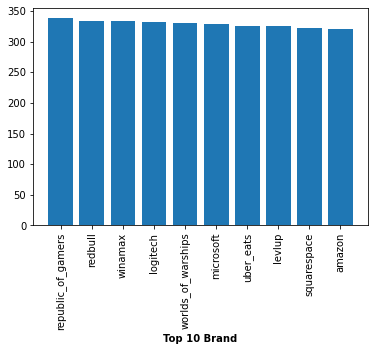

In [13]:
height = all_img.brand.value_counts().head(10)

bars = (all_img.brand.value_counts().head(10).index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars, rotation = 90)
plt.xlabel("Top 10 Brand", fontweight = "bold")

plt.show()

Dari *dataset* ini kita dapat melihat bahwa masing-masing *brand* di dalam *dataset* umumnya memiliki jumlah gambar yang sama dengan perbedaan yang tidak begitu mencolok. Selain itu, *dataset* memiliki gambar dari berbagai macam jenis produk, namun jumlah *brand* produk teknologi masih lebih banyak dari yang lain.